In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('D:/ml/thyroidDF.csv')
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [4]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [5]:
df.drop(['query_on_thyroxine','I131_treatment','lithium','TBG_measured','TBG','referral_source','patient_id'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
query_hypothyroid         0
query_hyperthyroid        0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
target                    0
dtype: int64

In [7]:
df['sex'].mode()

0    F
Name: sex, dtype: object

In [8]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [9]:
df['TSH']=df['TSH'].fillna(df['TSH'].mean())
df['T3']=df['T3'].fillna(df['T3'].mean())
df['TT4']=df['TT4'].fillna(df['TT4'].mean())
df['T4U']=df['T4U'].fillna(df['T4U'].mean())
df['FTI']=df['FTI'].fillna(df['FTI'].mean())

In [10]:
#df.isnull().sum()

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
df['sex']=le.fit_transform(df['sex'])

In [13]:
df['on_thyroxine']=le.fit_transform(df['on_thyroxine'])
df['on_antithyroid_meds']=le.fit_transform(df['on_antithyroid_meds'])
df['sick']=le.fit_transform(df['sick'])
df['pregnant']=le.fit_transform(df['pregnant'])
df['thyroid_surgery']=le.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid']=le.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid']=le.fit_transform(df['query_hyperthyroid'])
df['goitre']=le.fit_transform(df['goitre'])
df['tumor']=le.fit_transform(df['tumor'])
df['hypopituitary']=le.fit_transform(df['hypopituitary'])
df['TSH_measured']=le.fit_transform(df['TSH_measured'])
df['T3_measured']=le.fit_transform(df['T3_measured'])
df['TT4_measured']=le.fit_transform(df['TT4_measured'])
df['T4U_measured']=le.fit_transform(df['T4U_measured'])
df['FTI_measured']=le.fit_transform(df['FTI_measured'])

In [14]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,target
0,29,0,0,0,0,0,0,1,0,0,...,0.300000,0,1.970629,0,108.700305,0,0.976056,0,113.640746,-
1,29,0,0,0,0,0,0,0,0,0,...,1.600000,1,1.900000,1,128.000000,0,0.976056,0,113.640746,-
2,41,0,0,0,0,0,0,0,1,0,...,5.218403,0,1.970629,0,108.700305,0,0.976056,0,113.640746,-
3,36,0,0,0,0,0,0,0,0,0,...,5.218403,0,1.970629,0,108.700305,0,0.976056,0,113.640746,-
4,32,0,0,0,0,0,0,0,0,0,...,5.218403,0,1.970629,0,108.700305,0,0.976056,0,113.640746,S


In [15]:
#df['target'].isnull().sum()*100/len(df['target'])

In [16]:
#df['target'].series.sum()

In [17]:
df['target'].value_counts() 

-      6771
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        85
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

In [18]:
df['target'].replace('-','No',inplace=True)
'''df['target'].replace('K','1',inplace=True)
df['target'].replace('G','1',inplace=True)
df['target'].replace('E','1',inplace=True)
df['target'].replace('D|R','1',inplace=True)
df['target'].replace('OI','1',inplace=True)
df['target'].replace('GKJ','1',inplace=True)
df['target'].replace('LJ','1',inplace=True)
df['target'].replace('MI','1',inplace=True)
df['target'].replace('P','1',inplace=True)
df['target'].replace('C','1',inplace=True)
df['target'].replace('FK','1',inplace=True)
df['target'].replace('D','1',inplace=True)
df['target'].replace('H|K','1',inplace=True)
df['target'].replace('GI','1',inplace=True)
df['target'].replace('KJ','1',inplace=True)
df['target'].replace('C|I','1',inplace=True)
df['target'].replace('O','1',inplace=True)
df['target'].replace('Q','1',inplace=True)
df['target'].replace('MK','1',inplace=True)
df['target'].replace('B','1',inplace=True)
df['target'].replace('J','1',inplace=True)
df['target'].replace('AK','1',inplace=True)
df['target'].replace('GK','1',inplace=True)
df['target'].replace('S','1',inplace=True)
df['target'].replace('N','1',inplace=True)
df['target'].replace('M','1',inplace=True)
df['target'].replace('L','1',inplace=True)
df['target'].replace('A','1',inplace=True)
df['target'].replace('R','1',inplace=True)
df['target'].replace('F','1',inplace=True)
df['target'].replace('I','1',inplace=True)'''

"df['target'].replace('K','1',inplace=True)\ndf['target'].replace('G','1',inplace=True)\ndf['target'].replace('E','1',inplace=True)\ndf['target'].replace('D|R','1',inplace=True)\ndf['target'].replace('OI','1',inplace=True)\ndf['target'].replace('GKJ','1',inplace=True)\ndf['target'].replace('LJ','1',inplace=True)\ndf['target'].replace('MI','1',inplace=True)\ndf['target'].replace('P','1',inplace=True)\ndf['target'].replace('C','1',inplace=True)\ndf['target'].replace('FK','1',inplace=True)\ndf['target'].replace('D','1',inplace=True)\ndf['target'].replace('H|K','1',inplace=True)\ndf['target'].replace('GI','1',inplace=True)\ndf['target'].replace('KJ','1',inplace=True)\ndf['target'].replace('C|I','1',inplace=True)\ndf['target'].replace('O','1',inplace=True)\ndf['target'].replace('Q','1',inplace=True)\ndf['target'].replace('MK','1',inplace=True)\ndf['target'].replace('B','1',inplace=True)\ndf['target'].replace('J','1',inplace=True)\ndf['target'].replace('AK','1',inplace=True)\ndf['target'].re

In [20]:
#df['target'].value_counts()

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(9064, 24)

In [24]:
import statsmodels.api as sm

In [25]:
import statsmodels.formula.api as smf

In [26]:
df.shape

(9064, 24)

In [28]:
df['target']=le.fit_transform(df['target'])
df['psych']=le.fit_transform(df['psych'])
#df['target']

In [29]:
x=df.drop('target',axis=1)
y=df['target']

In [30]:
x.shape

(9064, 23)

In [31]:
model=smf.ols('y~x',data=df).fit()

In [32]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

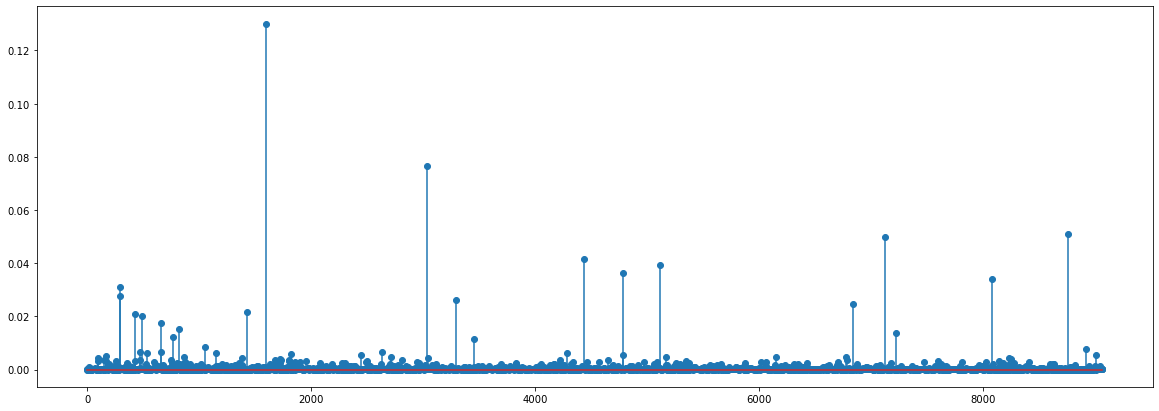

In [34]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),c)

In [35]:
(np.argmax(c),np.max(c))

(1598, 0.13009016812711885)

In [36]:
df1=df.drop(df.index[1598],axis=0)
df1.head(1)

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,goitre,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,target
0,29,0,0,0,0,0,0,1,0,0,...,0.3,0,1.970629,0,108.700305,0,0.976056,0,113.640746,25


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9063 entries, 0 to 9171
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9063 non-null   int64  
 1   sex                  9063 non-null   int32  
 2   on_thyroxine         9063 non-null   int32  
 3   on_antithyroid_meds  9063 non-null   int32  
 4   sick                 9063 non-null   int32  
 5   pregnant             9063 non-null   int32  
 6   thyroid_surgery      9063 non-null   int32  
 7   query_hypothyroid    9063 non-null   int32  
 8   query_hyperthyroid   9063 non-null   int32  
 9   goitre               9063 non-null   int32  
 10  tumor                9063 non-null   int32  
 11  hypopituitary        9063 non-null   int32  
 12  psych                9063 non-null   int64  
 13  TSH_measured         9063 non-null   int32  
 14  TSH                  9063 non-null   float64
 15  T3_measured          9063 non-null   i

In [38]:
x1=df1.drop('target',axis=1)
y1=df1['target']

In [39]:
y1

0       25
1       25
2       25
3       25
4       31
        ..
9167    25
9168    25
9169    15
9170    25
9171    25
Name: target, Length: 9063, dtype: int64

In [40]:
model1=smf.ols('y1~x1',data=df1).fit()

In [41]:
model_influence1 = model1.get_influence()
(c1, _) = model_influence1.cooks_distance

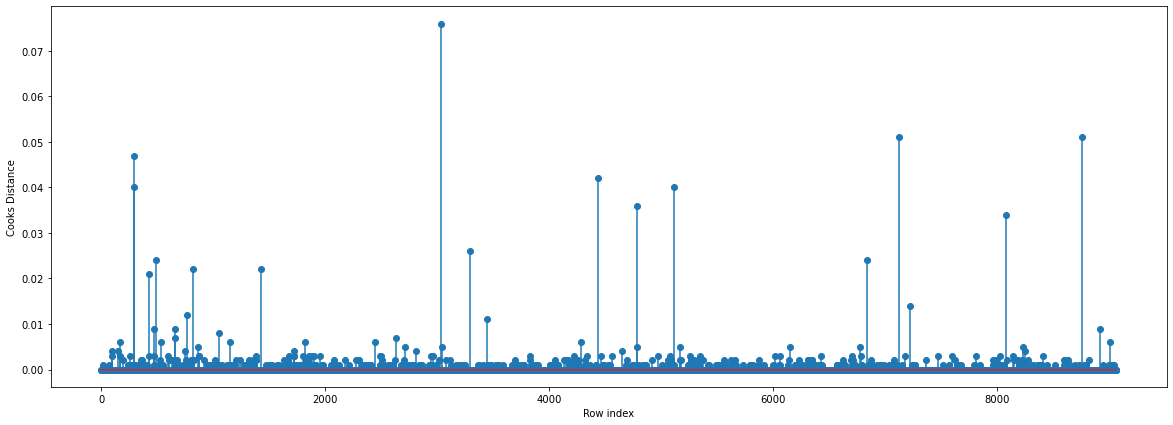

'objective\napproach\nbenifits of aproach\nresul'

In [43]:
#import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()
'''objective
approach
benifits of aproach
resul'''

In [44]:
x2=df1.iloc[:,0:23]
y2=df1.iloc[:,-1]
y2=y2.astype('str')

In [45]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x2,y2,test_size=0.2,random_state=40)

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7250, 23)
(7250,)
(1813, 23)
(1813,)


In [48]:
y_train

120     25
705     10
1022    25
1196    25
7042    25
        ..
7937    25
3659    25
6038    25
5502    25
7704    25
Name: target, Length: 7250, dtype: object

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
mod=dt.fit(x_train,y_train)

In [50]:
yp=dt.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [53]:
print("Accuracy:",accuracy_score(y_test, yp))

Accuracy: 0.9200220628792057
